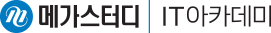

# 입문자를 위한, 머신러닝 기초   

## Web crawling test under the tag of framset

In [4]:
# 기본 Package loading:

import pandas as pd

from bs4 import BeautifulSoup
from selenium import webdriver

In [5]:
# Target web site:

url = 'https://finance.naver.com/marketindex/'

In [6]:
# (공통) Chrome Webdriver 실행:

driver = webdriver.Chrome('chromedriver.exe')

C:\Users\user\AppData\Local\Temp/ipykernel_7504/780319273.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


#### Case 1: 

'<html lang="ko"><head><script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market"></script>\n\n\t\n\t\n\t\n\t\n\n\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\t<title>시장지표 : 네이버 금융</title>\n\t\t\t\n\t\t\t\n\t\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n\n\n\n\n\n\t\n\t\t<meta property="og:title" content="네이버 금융">\n\t\t<meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png">\n\t\t<meta property="og:url" content="https://finance.naver.com">\n\t\t<meta property="og:description" content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공">\n    \n    \n\n<meta property="og:type" content="article">\n<meta property="og:article:thumbnailUrl" content="">\n<meta property="og:article:author" content="네이버금융">\n<meta prop
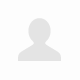
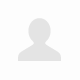

In [7]:
driver.get(url)
html = driver.page_source; html

In [8]:
soup = BeautifulSoup(html, 'html.parser')
# 뭐가 내용이 없어

In [9]:
<td class="sale">1,193.00</td>

SyntaxError: invalid syntax (Temp/ipykernel_7504/3801311973.py, line 1)

In [10]:
soup.find('td', class_="sale")

In [11]:
<iframe id="frame_ex1" title="환전 고시 환율" src="/marketindex/exchangeList.naver" width="100%" height="1378px" frameborder="0" scrolling="no" marginheight="0" marginwidth="0"></iframe>

SyntaxError: invalid syntax (Temp/ipykernel_7504/4030173666.py, line 1)

In [36]:
url = "https://finance.naver.com/marketindex"
plus = "/marketindex/exchangeList.naver"

url_new = url + plus

In [37]:
import requests

In [38]:
resp = requests.get(url_new)

In [39]:
soup = BeautifulSoup(html,"html.parser")

In [40]:
soup.find('td', class_="sale")

In [41]:
soup.find('div', class_="tbl_area").find("tbody").find("td", class_="sale")

AttributeError: 'NoneType' object has no attribute 'find'

#### Case 2: 

In [ ]:
url_frame = url + '/p00/A0001M002.nice'

In [ ]:
driver.get(url_frame)
html = driver.page_source

In [ ]:
BeautifulSoup(html, 'html.parser')
#BeautifulSoup(html, 'lxml')

#### Case 3: 개선사례

In [ ]:
driver.get(url)
html = driver.page_source; html

In [ ]:
soup = BeautifulSoup(html, 'html.parser'); soup
#soup_lxml = BeautifulSoup(html, 'lxml'); soup_lxml

In [ ]:
# BeautifulSoup(html, 'html.parser').find('frame').get('src')
soup.find('frame')
soup.find('frame').get('src')

In [ ]:
url_frame = url + soup.find('frame').get('src')

driver.get(url_frame)
html = driver.page_source

In [ ]:
soup = BeautifulSoup(html, 'html.parser'); soup
#soup_lxml = BeautifulSoup(html, 'lxml'); soup_lxml

### Tag 찾아보기 (예시) : 공지사항 내용 

In [ ]:
soup.find('div', attrs = {'class': 'board'}).find('ul')
soup.find('div', attrs = {'class': 'board'}).find('ul').getText()

#### 불필요한 문자열 제거 사례:

In [ ]:
soup.find('div', attrs = {'class': 'board'}).find('ul').getText().strip('\n\t')

#### regular expression (정규 표현식)

In [ ]:
import re

re.sub(r"[\n\t\s]*", "", soup.find('div', attrs = {'class': 'board'}).find('ul').getText())

In [ ]:
# r = remove
# [쓰고자하는 문자: 숫자라면 [0-9]]

In [ ]:
txt = "2021년 9월 분반기 상장/코스닥/코adfADRe"

re.sub("[0-9]", "", txt)   # 숫자 지워줘
re.sub("[a-z]", "", txt)   # 소문자 알파벳 지워줘
re.sub("[a-zA-Zㄱ-힣/9.]", "", txt)   # 소문자, 대문자 알파벳, 한글, 숫자 9 지워줘

## Web crawling test for popup

####  클릭Click 을 통해 새로운 창이 떴을 경우 (팝업창),

** 1) New window(새창) 으로 Focus 를 이동: **

- 메인창 0번, 팝업 1번부터 숫자 증가

In [42]:
driver.switch_to.parent_frame()

In [43]:
driver.switch_to.window(driver.window_handles[0])  # [1] : Click 을 통해 띄워지는 New window (새창) 의미

** 2) New windows 의 html 소스를 가져오기 **

In [ ]:
driver.page_source

** 3) New windows 닫기 close **

In [ ]:
driver.close()

** 4) 원래 Main windows 로 Focus 를 이동 **

In [ ]:
driver.switch_to_window(driver.window_handles[0])  # [0] : 원래 창(부모), Main window 의미

In [ ]:
driver.page_source